In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.stats.api as sm
from scipy.stats import variation

In [2]:
mydata=pd.read_csv('Wholesale Customers Analysis.csv')

SOLVING Q1.1- Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [143]:
mydata.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
mydata.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
x=mydata.copy()
x['Total']=x['Fresh']+x['Milk']+x['Grocery']+x['Frozen']+x['Detergents_Paper']+x['Delicatessen']
print(x)


     Buyer/Spender Channel Region  Fresh   Milk  Grocery  Frozen  \
0                1  Retail  Other  12669   9656     7561     214   
1                2  Retail  Other   7057   9810     9568    1762   
2                3  Retail  Other   6353   8808     7684    2405   
3                4   Hotel  Other  13265   1196     4221    6404   
4                5  Retail  Other  22615   5410     7198    3915   
..             ...     ...    ...    ...    ...      ...     ...   
435            436   Hotel  Other  29703  12051    16027   13135   
436            437   Hotel  Other  39228   1431      764    4510   
437            438  Retail  Other  14531  15488    30243     437   
438            439   Hotel  Other  10290   1981     2232    1038   
439            440   Hotel  Other   2787   1698     2510      65   

     Detergents_Paper  Delicatessen  Total  
0                2674          1338  34112  
1                3293          1776  33266  
2                3516          7844  36610  
3  

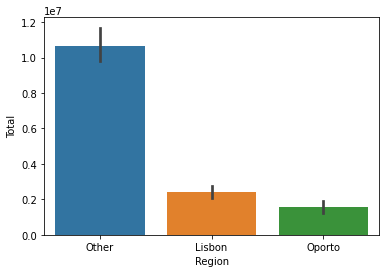

In [5]:
sns.barplot(x['Region'],x['Total'],estimator=sum)

In [148]:
x.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100


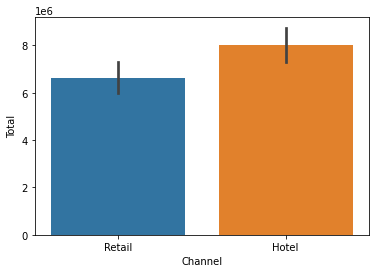

In [7]:
sns.barplot(x['Channel'],x['Total'],estimator=sum)

In [8]:
regiondf = x.groupby('Region')['Total'].sum()
print(regiondf)
print()
channeldf = x.groupby('Channel')['Total'].sum()
print(channeldf)

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total, dtype: int64

Channel
Hotel     7999569
Retail    6619931
Name: Total, dtype: int64




ANSWER Q1.1

* Highest amount of money customers are spending in the Region is from Others and lowest amount of money customers are spending in the region is from Oporto

* Highest amount of money customers are spending in the Channel is from Hotel and lowest amount of money customers are spending in the Channel is from Retail.


SOLVING Q1.2

In [9]:
table=pd.pivot_table(x,index=['Channel','Region'], values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'])
table

Delicatessen  Detergents_Paper         Fresh       Frozen  \
Channel Region                                                              
Hotel   Lisbon   1197.152542        950.525424  12902.254237  3127.322034   
        Oporto   1105.892857        482.714286  11650.535714  5745.035714   
        Other    1518.284360        786.682464  13878.052133  3656.900474   
Retail  Lisbon   1871.944444       8225.277778   5200.000000  2584.111111   
        Oporto   1239.000000       8410.263158   7289.789474  1540.578947   
        Other    1826.209524       6899.238095   9831.504762  1513.200000   

                     Grocery          Milk  
Channel Region                              
Hotel   Lisbon   4026.135593   3870.203390  
        Oporto   4395.500000   2304.250000  
        Other    3886.734597   3486.981043  
Retail  Lisbon  18471.944444  10784.000000  
        Oporto  16326.315789   9190.789474  
        Other   15953.809524  10981.009524

In [10]:
table.describe()

,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1459.747288,4292.450201,10125.356053,3027.858047,10510.073325,6769.538905
std,331.821030,3929.168253,3361.725243,1580.616424,7073.222791,3970.767546
min,1105.892857,482.714286,5200.000000,1513.200000,3886.734597,2304.250000
25%,1207.614407,827.643204,7925.218296,1801.461988,4118.476695,3582.786629
50%,1378.642180,3924.881759,10741.020238,2855.716573,10174.654762,6530.496432
75%,1749.228233,7893.767857,12589.324607,3524.505864,16233.189223,10385.697368
max,1871.944444,8410.263158,13878.052133,5745.035714,18471.944444,10981.009524


SOLVING Q1.3

In [147]:
x.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455,33226.136364
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937,26356.301730
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,904.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000,17448.750000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000,27492.000000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000,41307.500000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000,199891.000000


ANSWER Q1.3

The differenece between 75% and 25% values would determine which item shows most/least inconsistent behaviour, Therefore

* Item 'Fresh' shows most inconsistent behaviour
* Item 'Delicatessen' shows least inconsistent behaviour

SOLVING Q1.4

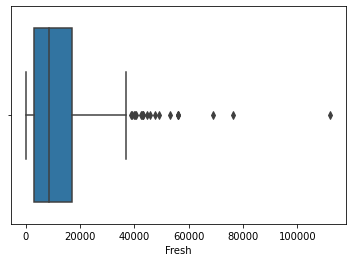

In [128]:
bplot=sns.boxplot(x['Fresh'], data=mydata);

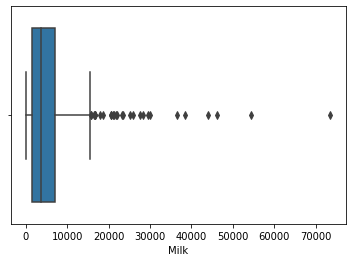

In [142]:
sns.boxplot(x['Milk'], data=mydata)

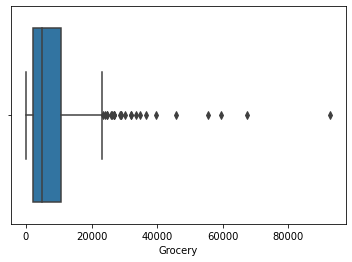

In [130]:
sns.boxplot(x['Grocery'], data=mydata)

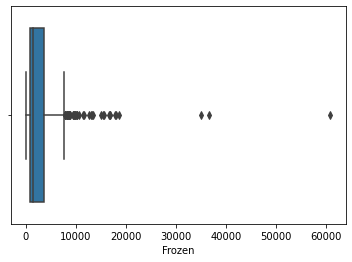

In [131]:
sns.boxplot(x['Frozen'], data=mydata)

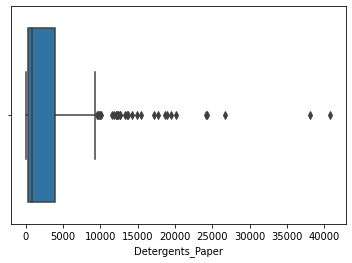

In [132]:
sns.boxplot(x['Detergents_Paper'], data=mydata)

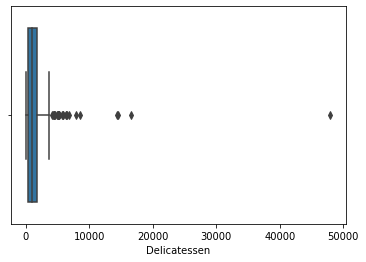

In [133]:
sns.boxplot(x['Delicatessen'], data=mydata)

* ANSWER Q1.4-

Yes there are outliers in the data as anything that lies above or below the iqr is an outlier.
As we can see from the Boxplots mentioned above that there are points showing above the inter quartile range, therefore we conclude that the data has outliers. 

SOLVING Q1.5

My recommendation for the business to become more profitable are as follows:
* As money spent by the customers in the 'Oporto' region is less so we should identify why is it happening as there could be a couple of factors that might come out as a reason like:

  * Are they having quality issues, do they have a better   quality product. If yes then we might have to work on the quality.
  * Are they having price issues; is the product too costly for them after all the taxes and charges? If yes then we might have to lower the costs inorder for them to buy more and increase our sales in that region.
  * Similarly with the channel 'Retail' because thats where the customers are spending less so we can can again identify the why is it just like we did above. 
  
  



SOLVING Q2.1

In [14]:
mydata1=pd.read_csv('Clear Mountain State University.csv')

In [15]:
mydata1.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [16]:
mydata1.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


ANSWER Q2.1

In [28]:
ct=pd.crosstab(mydata1['Gender'], mydata1['Major'])
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [27]:
ct1=pd.crosstab(mydata1['Gender'], mydata1['Grad Intention'])
ct1

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [25]:
ct2=pd.crosstab(mydata1['Gender'],mydata1['Employment'])
ct2

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [26]:
ct3=pd.crosstab(mydata1['Gender'],mydata1['Computer'])
ct3

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [21]:
mydata1['Gender'].value_counts(normalize=True)

Female    0.532258
Male      0.467742
Name: Gender, dtype: float64

ANSWER Q2.2-

* Probability that a randomly selected CMSU student will be Female P(Female)=53.22%

* Probability that a randomly selected CMSU student will be Male P(Male)=46.77%

In [32]:
mydata1['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [44]:
female_accounting=3/33
female_accounting

0.09090909090909091

In [46]:
female_cis=3/33
female_cis

0.09090909090909091

In [45]:
female_eco_fin=7/33
female_eco_fin

0.21212121212121213

In [47]:
female_intbiz=4/33
female_intbiz

0.12121212121212122

In [48]:
female_man=4/33
female_man


0.12121212121212122

In [49]:
female_other=3/33
female_other

0.09090909090909091

In [50]:
female_ret_mark=9/33
female_ret_mark

0.2727272727272727

In [51]:
female_undecided=0/33
female_undecided

0.0

In [60]:
male_accounting=4/29
male_accounting

0.13793103448275862

In [61]:
male_cis=1/29
male_cis

0.034482758620689655

In [62]:
male_eco_fin=4/29
male_eco_fin

0.13793103448275862

In [64]:
male_intbiz=2/29
male_intbiz

0.06896551724137931

In [65]:
male_man=6/29
male_man

0.20689655172413793

In [66]:
male_other=4/29
male_other

0.13793103448275862

In [67]:
male_ret_mark=5/29
male_ret_mark

0.1724137931034483

In [68]:
male_undecided=3/29
male_undecided

0.10344827586206896

Answer Q2.3

* The conditional probability of different majors among the Male students in CMSU are as follows:
 1.Accounting=13.79%
 2.Cis=3.45%
 3.Economics/Finance=13.79%
 4.International Business=6.90%
 5.Management=20.69%
 6.Other=13.79%
 7.Retailing/Marketing=17.24%
 8.Undecided=10.34%

* The conditional probability of different majors among the Female students in CMSU are as follows:
 1.Accounting=9.09%
 2.Cis=9.09%
 3.Economics/Finance=21.21%
 4.International Business=12.12%
 5.Management=12.12%
 6.Other=9.09%
 7.Retailing/Marketing=27.27%
 8.Undecided=0.00%

SOLVING Q2.4


In [70]:
p_male_grad=17/29
p_male_grad

0.5862068965517241

In [71]:
p_female_nolap=4/33
p_female_nolap

0.12121212121212122

Answer Q2.4

* The probability that a randomly chosen student is a Male and intends to graduate=58.62%

* The probability that a randomly chosen student is a Female and does not have a laptop=12.12%

SOLVING Q2.5

In [74]:
p_male_or_fullemp= (33+3)/62
p_male_or_fullemp

0.5806451612903226

In [75]:
p_female_intbiz_or_man=(4+4)/33
p_female_intbiz_or_man

0.24242424242424243

* The probability that a randomly chosen student is either a male or has a full-time employment=58.06%

* The conditional probability that given a female student is randomly chosen, she is majoring in international business or management=24.24%

SOLVING Q2.6

In [141]:
ct4=ct1.drop('Undecided',axis=1)
ct4


Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [94]:
P_f_intersection_yes=11/40
P_f_intersection_yes

0.275

In [95]:
P_f_p_yes=(33/40)*(28/40)
P_f_p_yes

0.5774999999999999

* As P(F Intersection Yes) is not equal to P(F)* P(Yes), therefore Graduate intention and being female are not independent events

SOLVING Q2.7

In [99]:

ct5=pd.crosstab(mydata1['Gender'], mydata1['GPA'])
ct5

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


ANSWER Q2.7.1

There are 8 Females and 9 Males with GPA less than 3
so,
The probability that his/her GPA is less than 3 = (8+9)/62 = 17/62 = 27.41%

In [100]:
ct6=pd.crosstab(mydata1['Gender'], mydata1['Salary'])
ct6

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0
Gender,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1


ANSWER Q2.7.2

* The conditional probability that a randomly selected Male earns 50 or more = 14/29 = 48.27%

* The conditional probability that a randomly selected Female earns 50 or more = 18/33 = 54.54%

Solving Q2.8

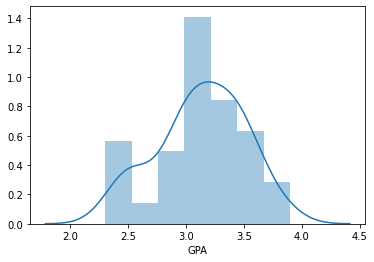

In [114]:
sns.distplot(mydata1['GPA']);

* FROM THE ABOVE HISTOGRAM WE CAN CONCLUDE THAT IT IS FOLLOWING A NORMAL DISTRIBUTION
  * MEAN=3.12
  * MEDIAN=3.15
  

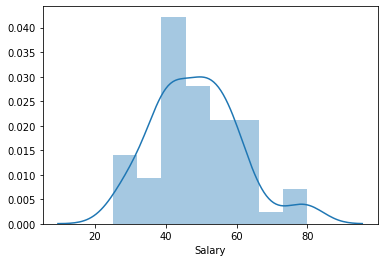

In [115]:
sns.distplot(mydata1['Salary']);

* FROM THE ABOVE HISTOGRAM WE CAN CONCLUDE THAT IT IS NOT FOLLOWING A NORMAL DISTRIBUTION
  * MEAN=48.54
  * MEDIAN=50.00
  

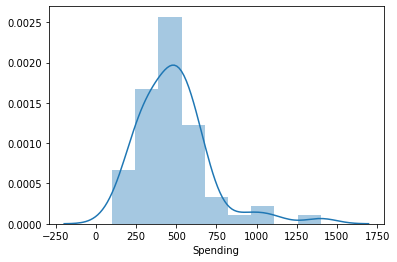

In [116]:
sns.distplot(mydata1['Spending']);

* FROM THE ABOVE HISTOGRAM WE CAN CONCLUDE THAT IT IS FOLLOWING A NORMAL DISTRIBUTION
  * MEAN=482.02
  * MEDIAN=500.00
 

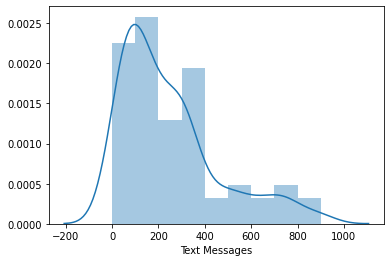

In [117]:
sns.distplot(mydata1['Text Messages']);

* FROM THE ABOVE HISTOGRAM WE CAN CONCLUDE THAT IT IS NOT FOLLOWING A NORMAL DISTRIBUTION
  
  * MEAN=246.20
  * MEDIAN=200.00
  

In [119]:
mydata1.mean()

ID                    31.500000
Age                   21.129032
GPA                    3.129032
Salary                48.548387
Social Networking      1.516129
Satisfaction           3.741935
Spending             482.016129
Text Messages        246.209677
dtype: float64

In [120]:
mydata1.median()

ID                    31.50
Age                   21.00
GPA                    3.15
Salary                50.00
Social Networking      1.00
Satisfaction           4.00
Spending             500.00
Text Messages        200.00
dtype: float64

In [151]:
mydata1.mode()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,21.0,Senior,Retailing/Marketing,Yes,3.0,Part-Time,40.0,1.0,4.0,500.0,Laptop,300.0
1,2,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [134]:
mydata2=pd.read_csv('A & B shingles.csv')

In [135]:
mydata2.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [136]:
mydata2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       36 non-null     float64
 1   B       31 non-null     float64
dtypes: float64(2)
memory usage: 704.0 bytes


In [137]:
t_statistic, p_value = ttest_1samp(mydata2.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


Since p value > 0.05, therefore we do not reject H0 . There is not enough evidence to conclude that the mean moisture content for Sample A shingles is less than 0.35 pounds per 100 square feet. 


In [139]:
t_statistic, p_value = ttest_1samp(mydata2.B, 0.35,nan_policy='omit' )
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


Since the p value < 0.05, therefore we reject H0 . There is enough evidence to conclude that the mean moisture content for Sample B shingles is not less than 0.35 pounds per 100 square feet. 

SOLVING Q3.2

In [140]:
t_statistic,p_value=ttest_ind(mydata2['A'],mydata2['B'],equal_var=True ,nan_policy='omit')  
print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))  

t_statistic=1.29 and pvalue=0.202


H0 : mu(A)= mu(B)  
Ha : mu(A)!= mu(B)  
alpha = 0.05  

Since the p value > alpha, therefore we do not reject H0. We can say that the population mean for shingles A and B are equal test assumptions when running a "two-sample t-test", the basic assumptions are that the distributions of the two populations are normal, and that the variances of the two distributions are the same. If those assumptions are not likely to be met, another testing procedure could be use.
